In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import List, Dict, Any
import matplotlib as mpl
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy import stats
from matplotlib.ticker import PercentFormatter
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
!mkdir /content/PDF /content/PNG

mkdir: cannot create directory ‘/content/PDF’: File exists
mkdir: cannot create directory ‘/content/PNG’: File exists


In [3]:
metric_colors = {
    "precision": "#1f77b4",
    "recall": "#ff7f0e",
    "f1_score": "#2ca02c",
    "false_positives": "#d62728",
    "false_negatives": "#9467bd",
    "true_positives": "#ffdb58",
    "precision": "#1f77b4",
    "recall": "#ff7f0e",
    "f1_score": "#2ca02c",
    "false_positives": "#d62728",
    "false_negatives": "#9467bd",
    "true_positives": "#ffdb58",
    "detection_rate": "#17becf",
    "severity_detection_rate": "#17becf",
    "severity_precision": "#1f77b4",
    "severity_recall": "#ff7f0e",
    "severity_f1_score": "#2ca02c"
}
metric_names_map = {
    "precision": "Precision",
    "recall": "Recall",
    "f1_score": "F1 Score",
    "false_positives": "False Positives",
    "false_negatives": "False Negatives",
    "true_positives": "True Positives",
    "precision": "Precision",
    "detection_rate": "Detection Rate",
    "severity_detection_rate": "Detection Rate",
    "severity_precision": "Precision",
    "severity_recall": "Recall",
    "severity_f1_score": "F1 Score"
}


tool_colors = {
    "Semgrep": "#1f77b4",
    "Coverity": "#ff7f0e",
    "CodeQL": "#2ca02c",
    "Bandit": "#d62728",
    "Horusec": "#9467bd"
}

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 16,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 20
})


In [4]:
data = [
    {
        "tool": "Semgrep",
        "detected_vulnerabilities": 227,
        "false_positives": 1198,
        "true_positives": 141,
        "false_negatives": 332,
    },
    {
        "tool": "Coverity",
        "detected_vulnerabilities": 92,
        "false_positives": 448,
        "true_positives": 7,
        "false_negatives": 466,
    },
    {
        "tool": "CodeQL",
        "detected_vulnerabilities": 89,
        "false_positives": 1246,
        "true_positives": 52,
        "false_negatives": 421,
    },
    {
        "tool": "Bandit",
        "detected_vulnerabilities": 237,
        "false_positives": 4725,
        "true_positives": 116,
        "false_negatives": 357,
    },
    {
        "tool": "Horusec",
        "detected_vulnerabilities": 106,
        "false_positives": 986,
        "true_positives": 36,
        "false_negatives": 437,
    }
]

df = pd.DataFrame(data)
df['cwe_noise_ratio'] = df['false_positives'] / df['true_positives']
df['detection_rate'] = round(df['detected_vulnerabilities']* 100/ 473)
df['recall'] = df['true_positives'] / (df['true_positives']+ df['false_negatives'])*100
df['precision'] = df['true_positives'] / (df['true_positives'] + df['false_positives'])*100
df['f1_score'] = (2 * (df['precision'] * df['recall'])) / (df['precision'] + df['recall'])

In [5]:
df

,tool,detected_vulnerabilities,false_positives,true_positives,false_negatives,cwe_noise_ratio,detection_rate,recall,precision,f1_score
0,Semgrep,227,1198,141,332,8.496454,48.0,29.809725,10.530246,15.562914
1,Coverity,92,448,7,466,64.000000,19.0,1.479915,1.538462,1.508621
2,CodeQL,89,1246,52,421,23.961538,19.0,10.993658,4.006163,5.872388
3,Bandit,237,4725,116,357,40.732759,50.0,24.524313,2.396199,4.365826
4,Horusec,106,986,36,437,27.388889,22.0,7.610994,3.522505,4.816054


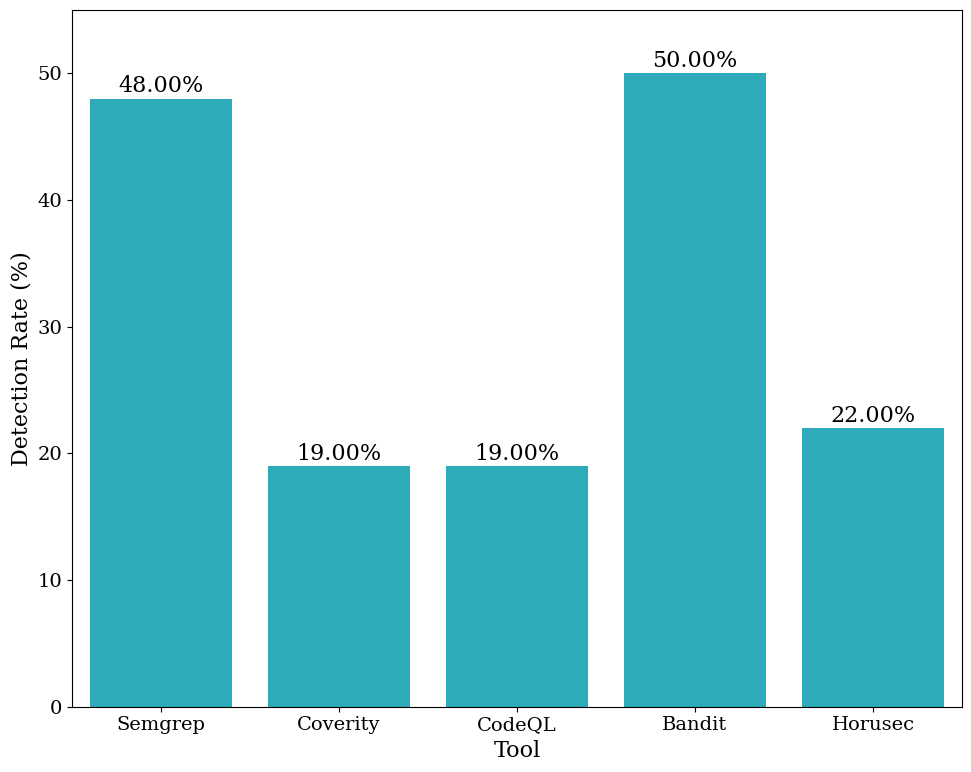

In [6]:
ig, ax1 = plt.subplots(figsize=(10, 8))

sns.barplot(
    x='tool',
    y='detection_rate',
    data=df,
    ax=ax1,
    color = metric_colors['detection_rate']
)

# Axis formatting
# ax1.set_title('Detection Rate by tool')
ax1.set_xlabel('Tool')
ax1.set_ylabel('Detection Rate (%)')
ax1.set_ylim(0, max(df['detection_rate']) * 1.1)

# Annotate each bar
for i, v in enumerate(df['detection_rate']):
    ax1.text(i, v + 0.5, f"{v:.2f}%", ha='center')

# Final layout adjustment
plt.tight_layout()
plt.savefig("PDF/detection_rate_by_tool.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/detection_rate_by_tool.png", format='png', bbox_inches='tight')
plt.show()

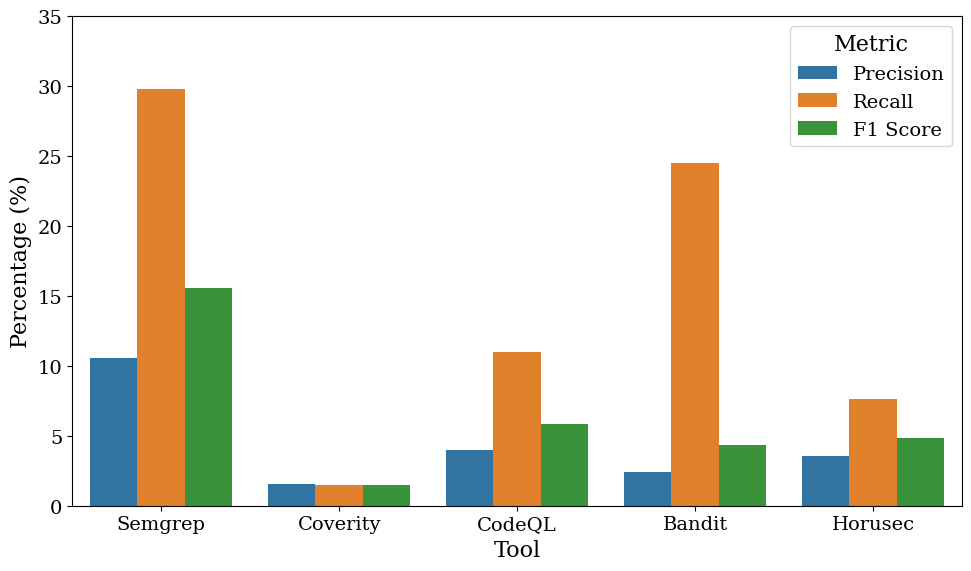

In [7]:
df_metrics = df.melt(id_vars="tool", value_vars=["precision", "recall", "f1_score"],
                     var_name="Metric", value_name="Percentage")

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_metrics, x="tool", y="Percentage", hue="Metric", palette=metric_colors)

handles, labels = ax.get_legend_handles_labels()
new_labels = [metric_names_map.get(label, label) for label in labels]
ax.legend(handles, new_labels, title='Metric')


# plt.title("Precision, Recall, and F1 Score by tool")
plt.ylabel("Percentage (%)")
plt.ylim(0, 35)
plt.xlabel("Tool")
plt.tight_layout()
plt.savefig("PDF/performance_by_tool.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/performance_by_tool.png", format='png', bbox_inches='tight')
plt.show()

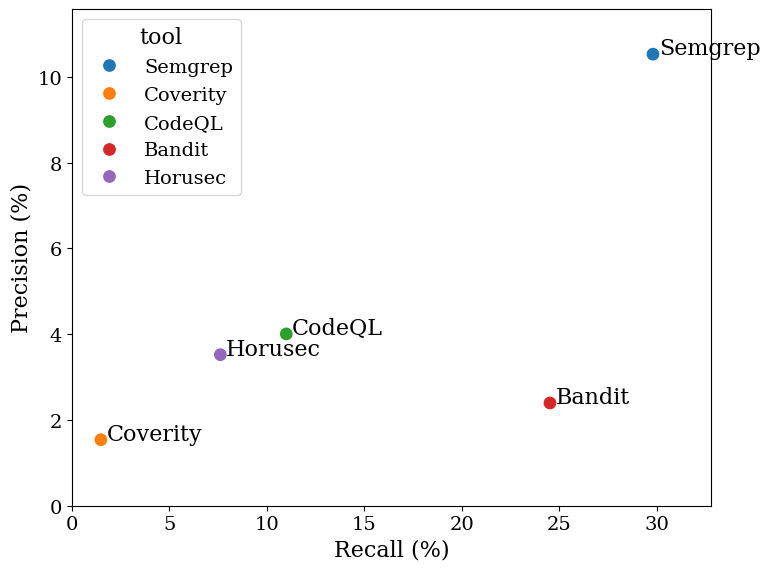

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="recall", y="precision", hue="tool", s=100 , palette=tool_colors)
for i in range(len(df)):
    plt.text(df["recall"][i]+0.3, df["precision"][i], df["tool"][i])
plt.xlabel("Recall (%)")
plt.ylabel("Precision (%)")
# plt.title("Precision vs Recall of tools")
plt.xlim(0, max(df["recall"])*1.1)
plt.ylim(0, max(df["precision"])*1.1)
plt.tight_layout()
plt.show()

In [9]:
# cwe data
cwe_pillars = ['CWE-284', 'CWE-697', 'CWE-693', 'CWE-435', 'CWE-682',
                 'CWE-707', 'CWE-691', 'CWE-664', 'CWE-710', 'CWE-703']
Semgrep_tp = {'CWE-284': 13, 'CWE-697': 0, 'CWE-693': 6, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 62, 'CWE-691': 0, 'CWE-664': 60, 'CWE-710': 0, 'CWE-703': 0}
Semgrep_fp = {'CWE-284': 99, 'CWE-697': 7, 'CWE-693': 327, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 499, 'CWE-691': 0, 'CWE-664': 263, 'CWE-710': 3, 'CWE-703': 0}
# CodeQL
CodeQL_tp =  {'CWE-284': 0, 'CWE-697': 0, 'CWE-693': 1, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 14, 'CWE-691': 0, 'CWE-664': 37, 'CWE-710': 0, 'CWE-703': 0}
CodeQL_fp =  {'CWE-284': 64, 'CWE-697': 0, 'CWE-693': 250, 'CWE-435': 1, 'CWE-682': 0, 'CWE-707': 213, 'CWE-691': 0, 'CWE-664': 717, 'CWE-710': 1, 'CWE-703': 0}



# Bandit
Bandit_tp = {'CWE-284': 6, 'CWE-697': 0, 'CWE-693': 4, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 56, 'CWE-691': 0, 'CWE-664': 49, 'CWE-710': 0, 'CWE-703': 1}
Bandit_fp  = {'CWE-284': 106, 'CWE-697': 0, 'CWE-693': 174, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 505, 'CWE-691': 0, 'CWE-664': 548, 'CWE-710': 0, 'CWE-703': 3392}
# Horusec
Horusec_tp = {'CWE-284': 20, 'CWE-697': 0, 'CWE-693': 2, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 0, 'CWE-691': 0, 'CWE-664': 14, 'CWE-710': 0, 'CWE-703': 0}
Horusec_fp = {'CWE-284': 650, 'CWE-697': 0, 'CWE-693': 179, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 0, 'CWE-691': 0, 'CWE-664': 157, 'CWE-710': 0, 'CWE-703': 0}


# Coverity
Coverity_tp =  {'CWE-284': 4, 'CWE-697': 0, 'CWE-693': 3, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 0, 'CWE-691': 0, 'CWE-664': 0, 'CWE-710': 0, 'CWE-703': 0}
Coverity_fp =  {'CWE-284': 146, 'CWE-697': 0, 'CWE-693': 138, 'CWE-435': 0, 'CWE-682': 0, 'CWE-707': 0, 'CWE-691': 0, 'CWE-664': 0, 'CWE-710': 164, 'CWE-703': 0}


In [10]:
tp_tool_by_pillar_df = pd.DataFrame({
    'cwe_pillar': cwe_pillars,
    'Semgrep': list(Semgrep_tp.values()),
    'CodeQL': list(CodeQL_tp.values()),
    'Bandit': list(Bandit_tp.values()),
    'Horusec': list(Horusec_tp.values()),
    'Coverity': list(Coverity_tp.values())
})
tp_tool_by_pillar_df

,cwe_pillar,Semgrep,CodeQL,Bandit,Horusec,Coverity
0,CWE-284,13,0,6,20,4
1,CWE-697,0,0,0,0,0
2,CWE-693,6,1,4,2,3
3,CWE-435,0,0,0,0,0
4,CWE-682,0,0,0,0,0
5,CWE-707,62,14,56,0,0
6,CWE-691,0,0,0,0,0
7,CWE-664,60,37,49,14,0
8,CWE-710,0,0,0,0,0
9,CWE-703,0,0,1,0,0


In [11]:
fp_tool_by_pillar_df = pd.DataFrame({
    'cwe_pillar': cwe_pillars,
    'Semgrep': list(Semgrep_fp.values()),
    'CodeQL': list(CodeQL_fp.values()),
    'Bandit': list(Bandit_fp.values()),
    'Horusec': list(Horusec_fp.values()),
    'Coverity': list(Coverity_fp.values())
})
fp_tool_by_pillar_df

,cwe_pillar,Semgrep,CodeQL,Bandit,Horusec,Coverity
0,CWE-284,99,64,106,650,146
1,CWE-697,7,0,0,0,0
2,CWE-693,327,250,174,179,138
3,CWE-435,0,1,0,0,0
4,CWE-682,0,0,0,0,0
5,CWE-707,499,213,505,0,0
6,CWE-691,0,0,0,0,0
7,CWE-664,263,717,548,157,0
8,CWE-710,3,1,0,0,164
9,CWE-703,0,0,3392,0,0


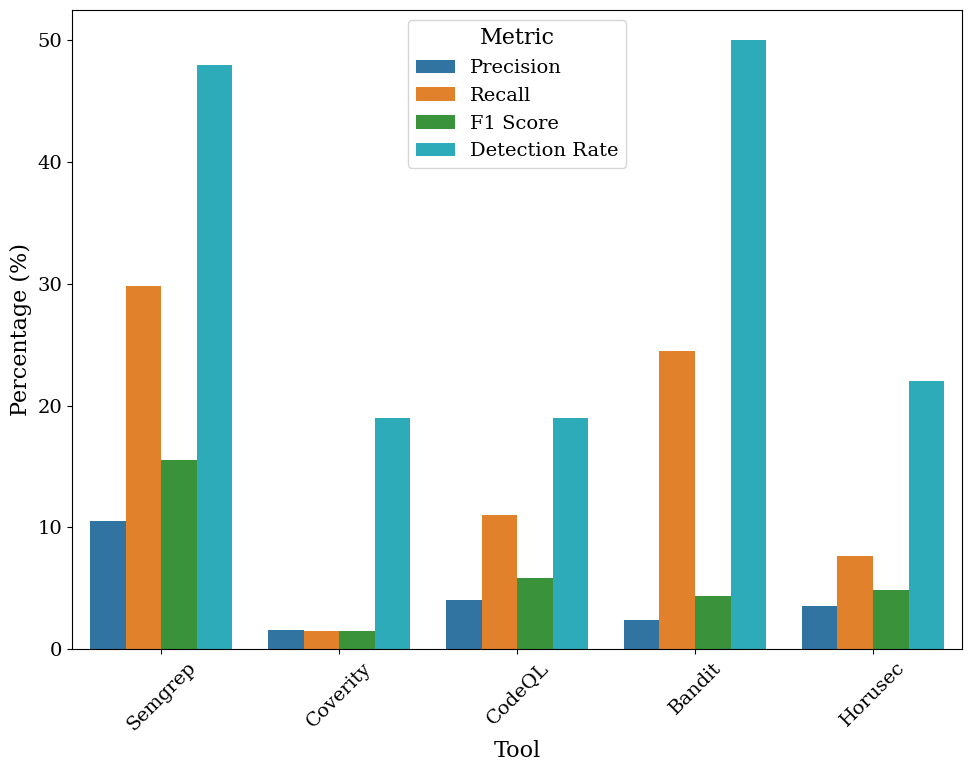

In [12]:
metrics_to_plot = ['precision', 'recall', 'f1_score', 'detection_rate']
performance_melted = pd.melt(df, id_vars=['tool'],
                              value_vars=metrics_to_plot,
                                var_name='Metric', value_name='Value')


# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x='tool',
    y='Value',
    hue='Metric',
    data=performance_melted,
    palette=metric_colors
)

# Update legend labels using the rename map
handles, labels = ax.get_legend_handles_labels()
new_labels = [metric_names_map.get(label, label) for label in labels]
ax.legend(handles, new_labels, title='Metric')

# Add plot details
# plt.title('Performance Metrics for CWE Pillar Classification')
plt.ylabel('Percentage (%)')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("PDF/performance_plot.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/performance_plot.png", format='png', bbox_inches='tight')
plt.show()

In [13]:
selected_pillars = set(cwe_pillars) - {'CWE-697', 'CWE-435', 'CWE-682', 'CWE-691', 'CWE-710'}

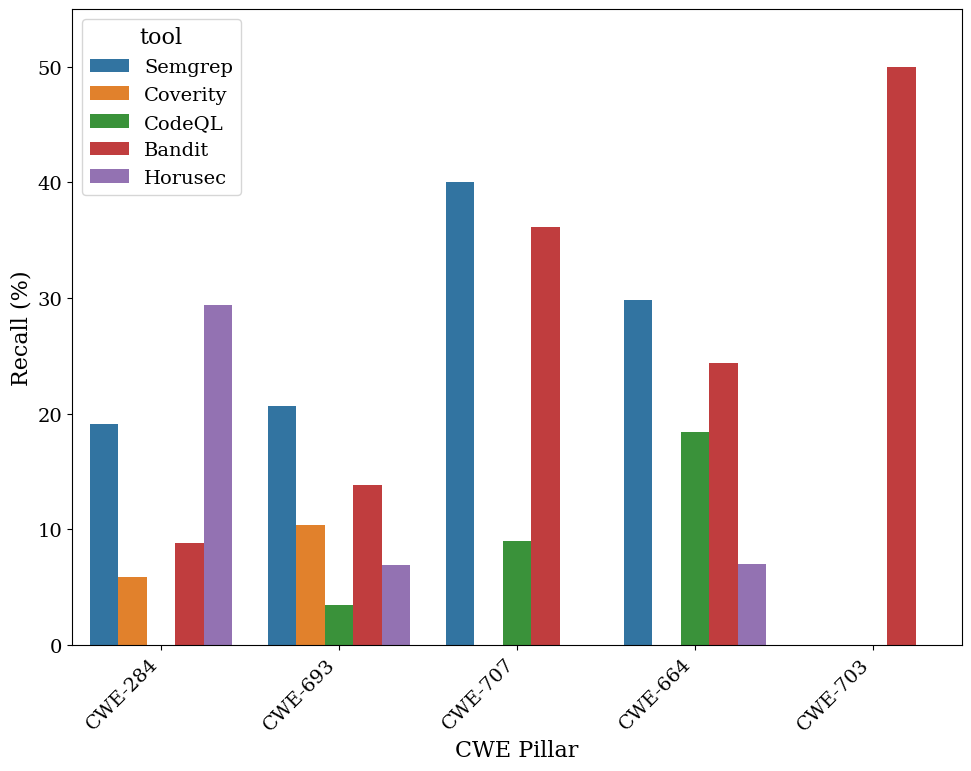

In [14]:
ground_truth_per_pillar = {'CWE-284': 68, 'CWE-697': 3, 'CWE-693': 29, 'CWE-435': 9, 'CWE-682': 4, 'CWE-707': 155, 'CWE-691': 16, 'CWE-664': 201, 'CWE-710': 1, 'CWE-703': 2}
filtered_df = tp_tool_by_pillar_df[tp_tool_by_pillar_df['cwe_pillar'].isin(selected_pillars)]


# Melt tools into long format
tp_melted = filtered_df.melt(
    id_vars='cwe_pillar',
    value_vars=df['tool'],
    var_name='tool',
    value_name='true_positives'
)

# Add ground truth and compute detection rate
tp_melted['ground_truth'] = tp_melted['cwe_pillar'].map(ground_truth_per_pillar)
tp_melted['recall'] = tp_melted['true_positives']* 100 / tp_melted['ground_truth']

# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=tp_melted,
    x='cwe_pillar',
    y='recall',
    hue='tool',
    palette=tool_colors
)

# Axis formatting
# plt.title('Recall per CWE Pillar by Tool')
plt.ylabel('Recall (%)')
plt.xlabel('CWE Pillar')
plt.ylim(0, 55)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("PDF/recall_by_pillar.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/recall_by_pillar.png", format='png', bbox_inches='tight')
plt.show()

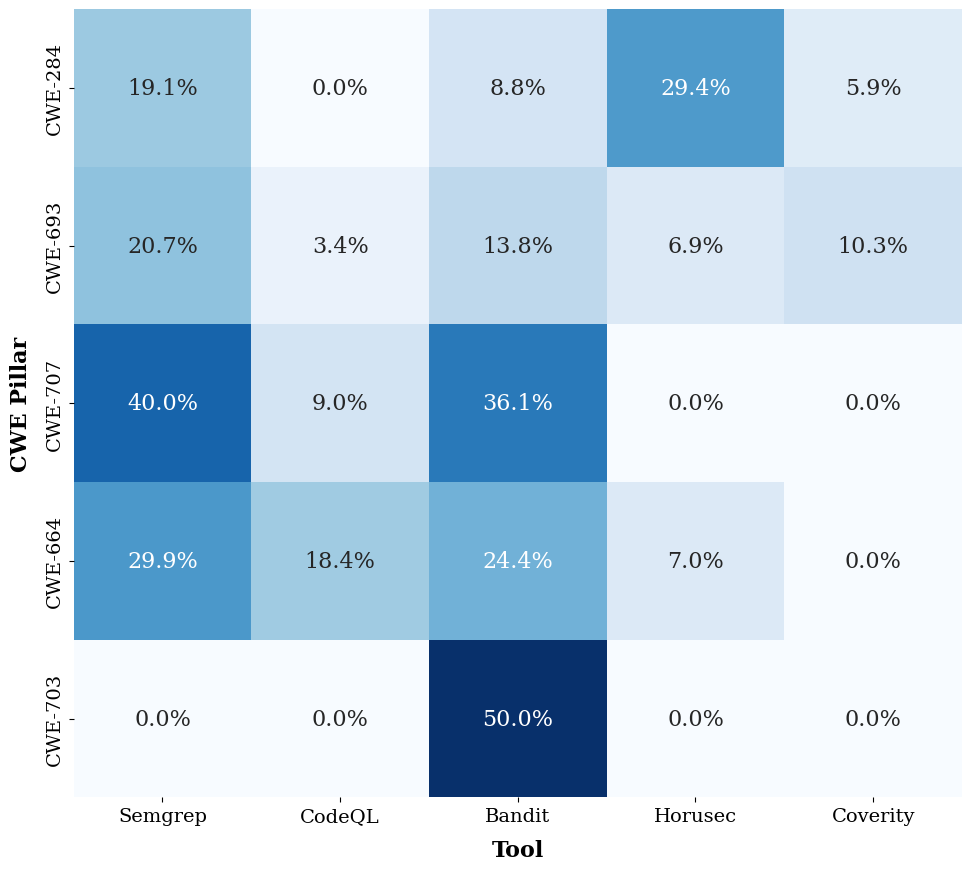

In [15]:
detection_df = tp_tool_by_pillar_df.copy()

for tool in df['tool']:
    detection_df[tool] = detection_df.apply(
        lambda row: row[tool] / ground_truth_per_pillar[row['cwe_pillar']],
        axis=1
    )
detection_df = detection_df[detection_df['cwe_pillar'].isin(selected_pillars)]

heatmap_df = detection_df.set_index('cwe_pillar')


min_tp = heatmap_df.min().min()
max_tp = heatmap_df.max().max()

plt.figure(figsize=(10, 9))
sns.heatmap(heatmap_df, annot=True, fmt='.1%', cmap="Blues",
            vmin=min_tp, vmax=max_tp, cbar_kws={'label': 'Detection Rate'},
            cbar=False)
# plt.title("Detection Rate per Tool per CWE Pillar",  pad=10)

plt.ylabel("CWE Pillar", fontweight='bold')
# Add padding to y label
plt.gca().yaxis.labelpad = 10
plt.xlabel("Tool", fontweight='bold')
plt.gca().xaxis.labelpad = 10
plt.tight_layout()



plt.savefig("PDF/detection_rate_heatmap.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/detection_rate_heatmap.png", format='png', bbox_inches='tight')
plt.show()

In [16]:
# # Severity detection rate
# severity_detection_per_tool = {
#     'Semgrep':130,
#     'CodeQL':174,
#     'Bandit':179,
#     'Horusec':171,
#     'Coverity':166,

# }
# severity_ground_truth = 476
# severity_detection_rate_per_tool = {k: v*100 / severity_ground_truth for k, v in severity_detection_per_tool.items()}
# severity_detection_rate_per_tool

In [17]:
# df['severity_detection_rate'] = severity_detection_rate_per_tool.values()
# df

In [18]:

# plt.figure(figsize=(10, 8))

# plt.bar(
#     severity_detection_rate_per_tool.keys(),
#     severity_detection_rate_per_tool.values(),
#     color='skyblue'
# )

# plt.xlabel('Tool')
# plt.ylabel('Recall (%)')
# # plt.title("Severity Recall by Tool")
# plt.tight_layout()
# plt.savefig("PDF/severity_recall.pdf", format='pdf', bbox_inches='tight')
# plt.savefig("PNG/severity_recall.png", format='png', bbox_inches='tight')
# plt.show()

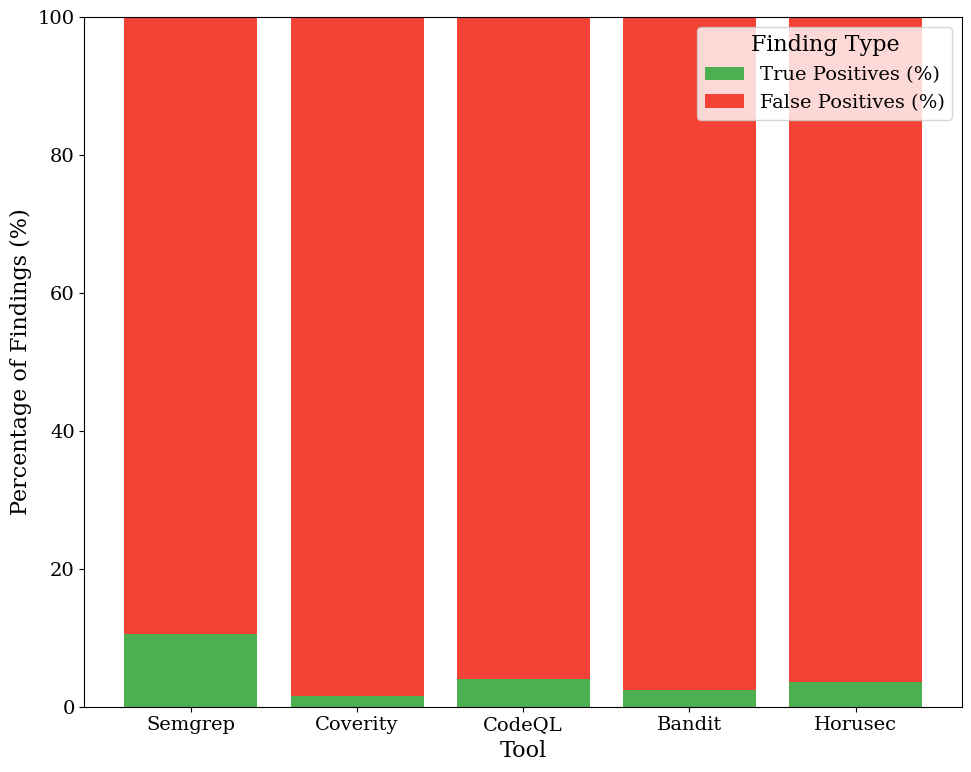

In [19]:
# Sum TP and FP per tool
tp_counts = tp_tool_by_pillar_df[df['tool']].sum()
fp_counts = fp_tool_by_pillar_df[df['tool']].sum()

# Calculate percentage
total = tp_counts + fp_counts
tp_percent = (tp_counts / total * 100).round(2)
fp_percent = (fp_counts / total * 100).round(2)

# Create stacked bar components
bar_width = 0.5
x = np.arange(len(df['tool']))

plt.figure(figsize=(10, 8))
plt.bar(x, tp_percent, label='True Positives (%)', color='#4CAF50')
plt.bar(x, fp_percent, bottom=tp_percent, label='False Positives (%)', color='#F44336')

# Axes and legend
plt.xticks(x, df['tool'])
plt.ylim(0, 100)
plt.ylabel('Percentage of Findings (%)')
plt.xlabel('Tool')
# plt.title('Proportion of True vs False Positives per Tool')
plt.legend(title='Finding Type')
plt.tight_layout()
plt.savefig("PDF/tp_fp_stacked_percent_bar.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/tp_fp_stacked_percent_bar.png", format='png', bbox_inches='tight')
plt.show()


In [20]:
df
df.columns[:]

Index(['tool', 'detected_vulnerabilities', 'false_positives', 'true_positives',
       'false_negatives', 'cwe_noise_ratio', 'detection_rate', 'recall',
       'precision', 'f1_score'],
      dtype='object')

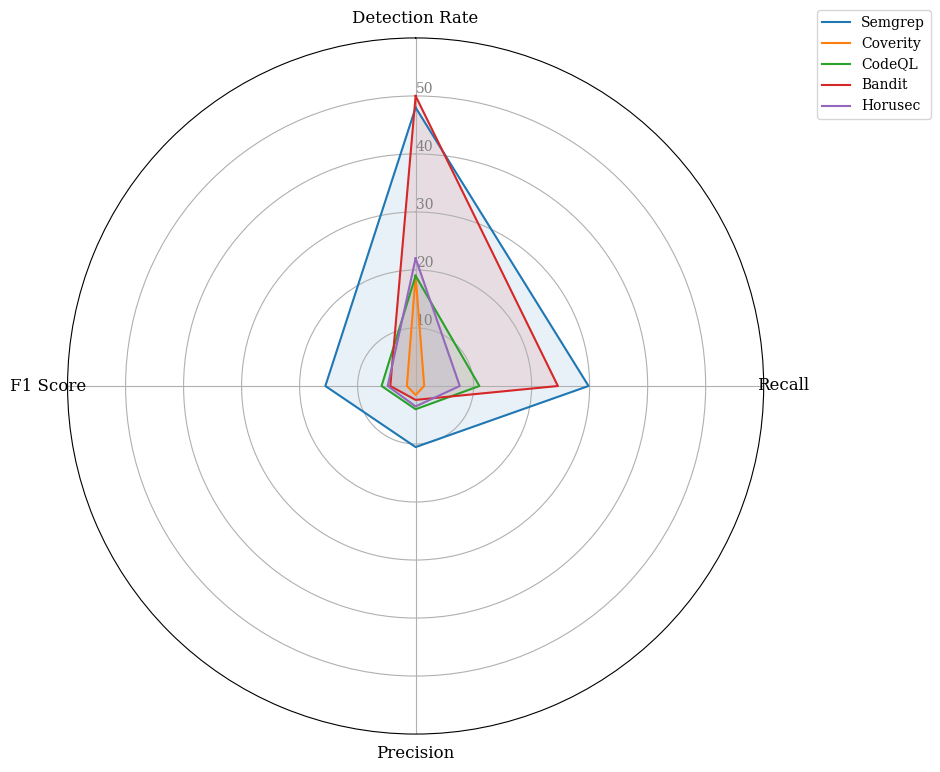

In [21]:
categories = df.columns[6:10]
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # loop

# Create radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each tool
for _, row in df.iterrows():
    values = row[categories].tolist()
    values += values[:1]  # close loop
    tool = row["tool"]
    color = tool_colors.get(tool, '#333333')

    ax.plot(angles, values, label=tool, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

# Customize axes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels([col.replace("_", " ").title() for col in categories], fontsize=12)

# Optional: set radial ticks manually for better clarity
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30, 40, 50], color='gray', size=10)
plt.ylim(0, 60)

# Title and legend
# plt.title("Overall Tool CWE-Pillar Classification Performance", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.05), fontsize=10)

plt.tight_layout()
plt.savefig("PDF/tool_performance_radar.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/tool_performance_radar.png", format='png', bbox_inches='tight')
plt.show()

In [22]:
# From Severity severity_final.json

severity_precision = {
    "Semgrep": 53.333333333333336,
    "Coverity": 44.827586206896555,
    "CodeQL": 44.57831325301205,
    "Bandit": 47.23404255319149,
    "HoruSec": 43.269230769230774
}

severity_recall = {
    "Semgrep": 25.210084033613445,
    "Coverity": 8.193277310924369,
    "CodeQL": 7.773109243697479,
    "Bandit": 23.319327731092436,
    "HoruSec": 9.453781512605042
}

severity_f1_score = {
    "Semgrep": 34.236804564907274,
    "Coverity": 13.854351687388988,
    "CodeQL": 13.237924865831843,
    "Bandit": 31.223628691983123,
    "HoruSec": 15.517241379310345
}

df['severity_recall'] = severity_recall.values()
df['severity_precision'] = severity_precision.values()
df['severity_f1_score'] = severity_f1_score.values()

In [23]:
df[['tool', 'severity_recall', 'severity_precision', 'severity_f1_score']]

,tool,severity_recall,severity_precision,severity_f1_score
0,Semgrep,25.210084,53.333333,34.236805
1,Coverity,8.193277,44.827586,13.854352
2,CodeQL,7.773109,44.578313,13.237925
3,Bandit,23.319328,47.234043,31.223629
4,Horusec,9.453782,43.269231,15.517241


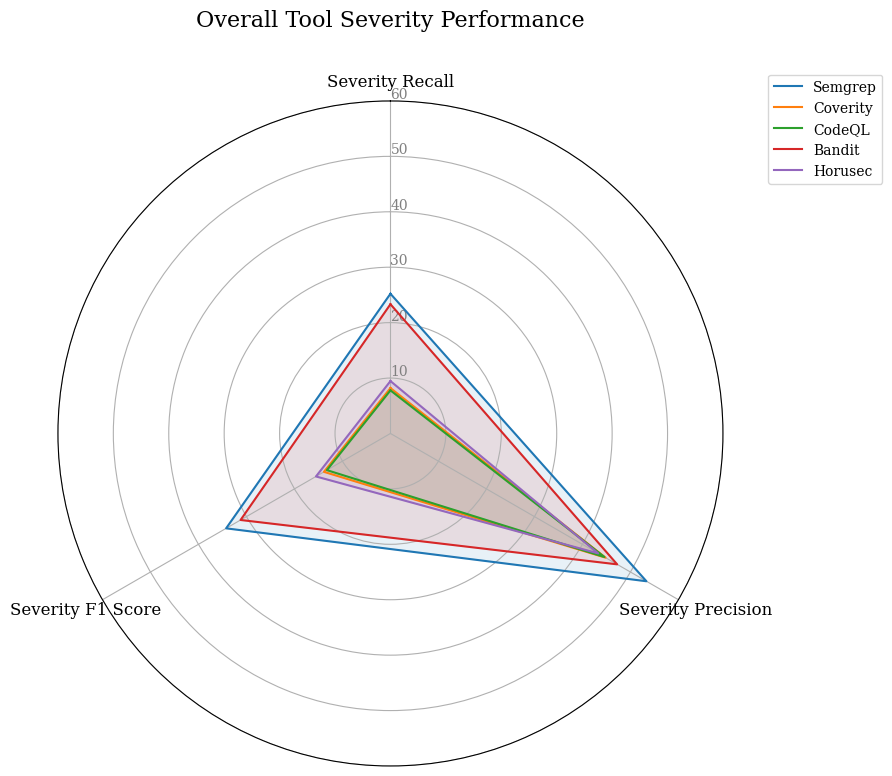

In [24]:
categories = df.columns[10:13]
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # loop

# Create radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each tool
for _, row in df.iterrows():
    values = row[categories].tolist()
    values += values[:1]  # close loop
    tool = row["tool"]
    color = tool_colors.get(tool, '#333333')

    ax.plot(angles, values, label=tool, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

# Customize axes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels([col.replace("_", " ").title() for col in categories], fontsize=12)

# Optional: set radial ticks manually for better clarity
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30, 40, 50, 60], color='gray', size=10)
plt.ylim(0, 60)

# Title and legend
plt.title("Overall Tool Severity Performance", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.05), fontsize=10)

plt.tight_layout()
plt.savefig("PDF/tool_performance_severity_radar.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/tool_performance_severity_radar.png", format='png', bbox_inches='tight')
plt.show()

In [25]:
df

,tool,detected_vulnerabilities,false_positives,true_positives,false_negatives,cwe_noise_ratio,detection_rate,recall,precision,f1_score,severity_recall,severity_precision,severity_f1_score
0,Semgrep,227,1198,141,332,8.496454,48.0,29.809725,10.530246,15.562914,25.210084,53.333333,34.236805
1,Coverity,92,448,7,466,64.000000,19.0,1.479915,1.538462,1.508621,8.193277,44.827586,13.854352
2,CodeQL,89,1246,52,421,23.961538,19.0,10.993658,4.006163,5.872388,7.773109,44.578313,13.237925
3,Bandit,237,4725,116,357,40.732759,50.0,24.524313,2.396199,4.365826,23.319328,47.234043,31.223629
4,Horusec,106,986,36,437,27.388889,22.0,7.610994,3.522505,4.816054,9.453782,43.269231,15.517241


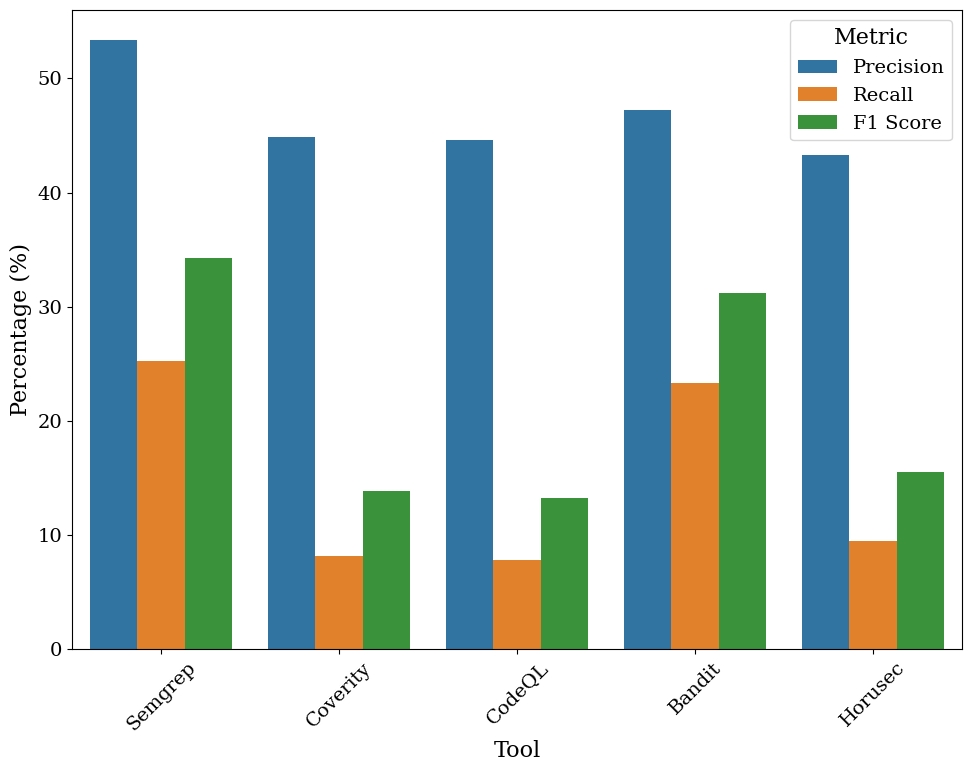

In [35]:
metrics_to_plot = ['severity_precision', 'severity_recall', 'severity_f1_score']
performance_melted = pd.melt(df, id_vars=['tool'],
                              value_vars=metrics_to_plot,
                                var_name='Metric', value_name='Value')


# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x='tool',
    y='Value',
    hue='Metric',
    data=performance_melted,
    palette=metric_colors
)

# Update legend labels using the rename map
handles, labels = ax.get_legend_handles_labels()
new_labels = [metric_names_map.get(label, label) for label in labels]
ax.legend(handles, new_labels, title='Metric')

# Add plot details
# plt.title('Performance Metrics for Severity Estimation')
plt.ylabel('Percentage (%)')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("PDF/performance_severity_plot.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/performance_severity_plot.png", format='png', bbox_inches='tight')
plt.show()

In [27]:
!unzip "/content/JsonFiles.zip"

Archive:  /content/JsonFiles.zip
replace JsonFiles/bandit_pred.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/bandit_true.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/code_ql_pred.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/code_ql_true.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/coverity_pred.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/coverity_true.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/horusec_pred.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/horusec_true.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/semgrep_pred.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace JsonFiles/semgrep_true.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [28]:
import json

with open("/content/JsonFiles/bandit_pred.json", 'r') as f:
  Bandit_pred: list[str] = json.load(f)
with open("/content/JsonFiles/bandit_true.json", 'r') as f:
  Bandit_true: list[str] = json.load(f)

with open("/content/JsonFiles/code_ql_pred.json", 'r') as f:
  CodeQL_pred: list[str] = json.load(f)
with open("/content/JsonFiles/code_ql_true.json", 'r') as f:
  CodeQL_true: list[str] = json.load(f)

with open("/content/JsonFiles/coverity_pred.json", 'r') as f:
  Coverity_pred: list[str] = json.load(f)
with open("/content/JsonFiles/coverity_true.json", 'r') as f:
  Coverity_true: list[str] = json.load(f)

with open("/content/JsonFiles/horusec_pred.json", 'r') as f:
  Horusec_pred: list[str] = json.load(f)
with open("/content/JsonFiles/horusec_true.json", 'r') as f:
  Horusec_true: list[str] = json.load(f)
with open("/content/JsonFiles/semgrep_pred.json", 'r') as f:
  Semgrep_pred: list[str] = json.load(f)
with open("/content/JsonFiles/semgrep_true.json", 'r') as f:
  Semgrep_true: list[str] = json.load(f)

In [29]:
Semgrep_pred[:10]

['MEDIUM',
 'MEDIUM',
 'MEDIUM',
 'HIGH',
 'HIGH',
 'MEDIUM',
 'HIGH',
 'MEDIUM',
 'MEDIUM',
 'HIGH']

#Confusion Matrices

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patheffects import withStroke
from sklearn.metrics import confusion_matrix

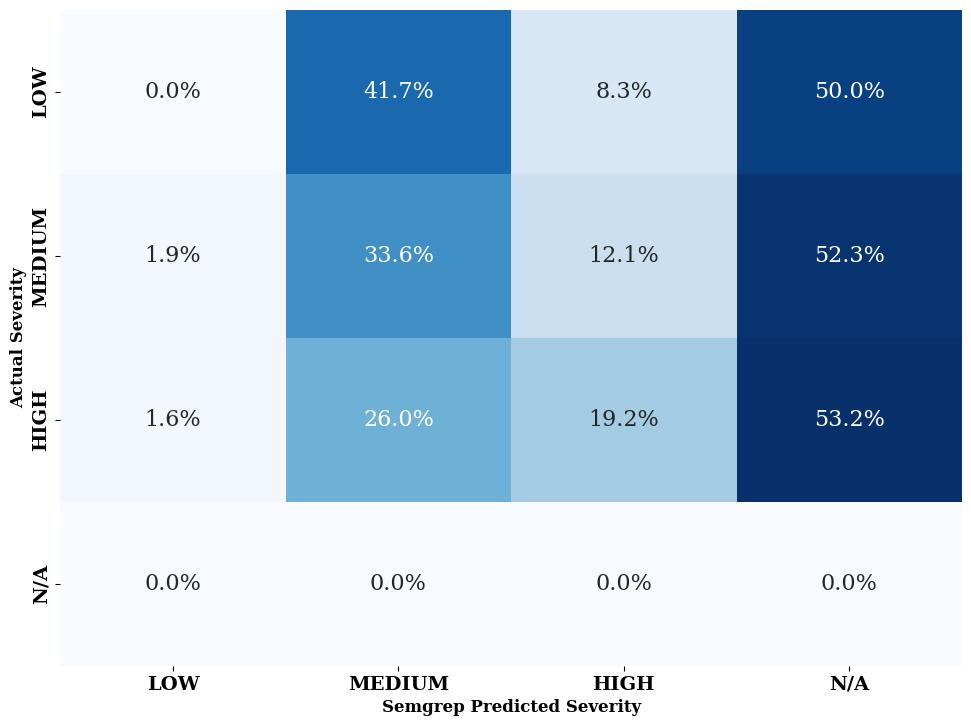

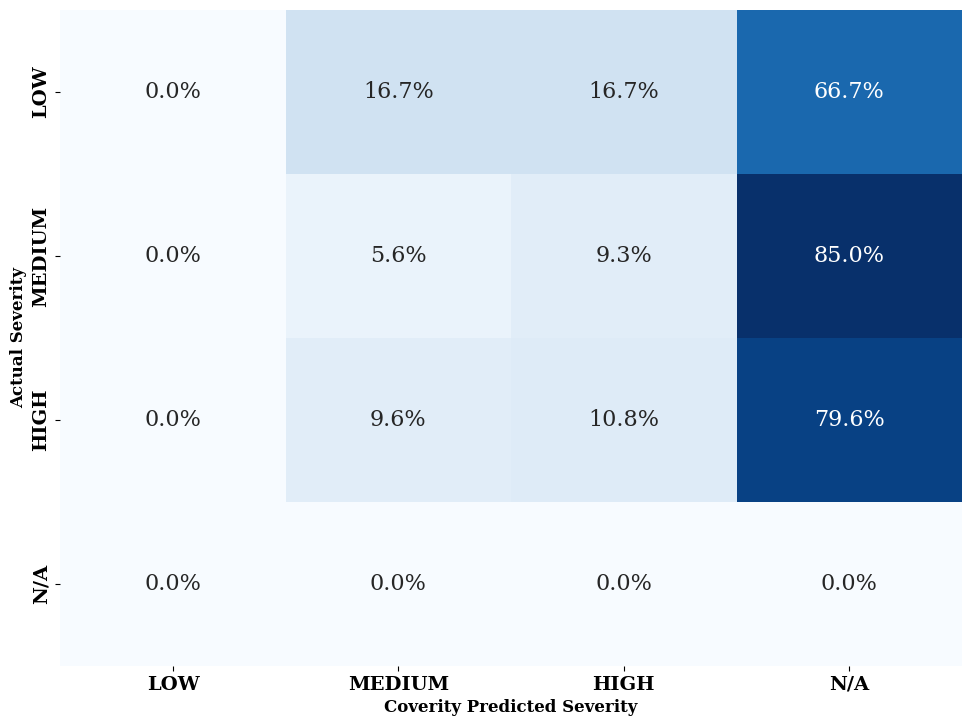

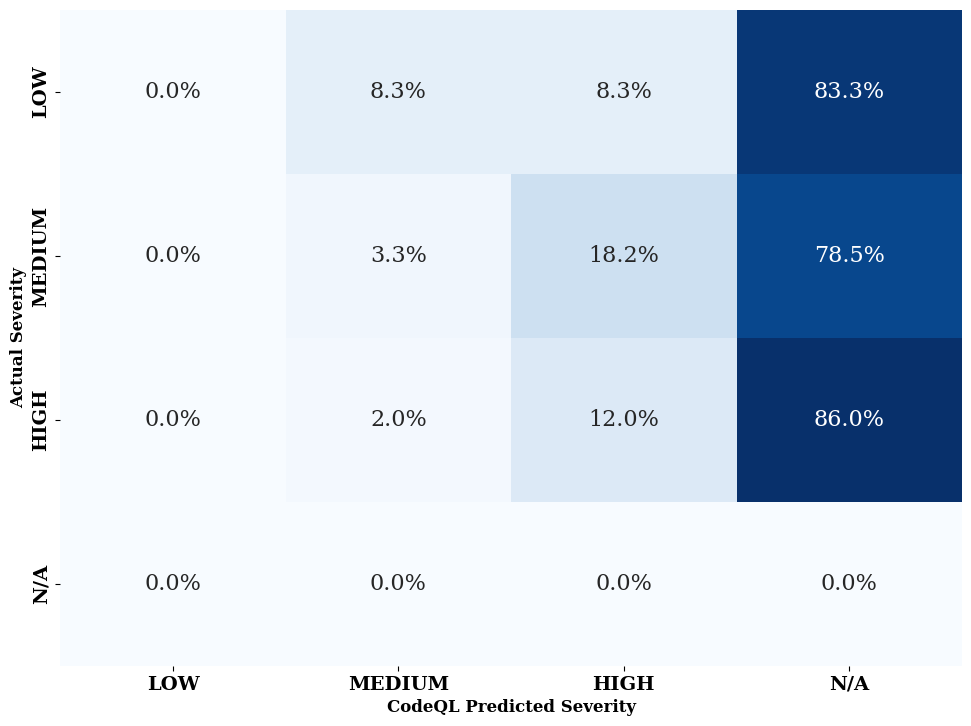

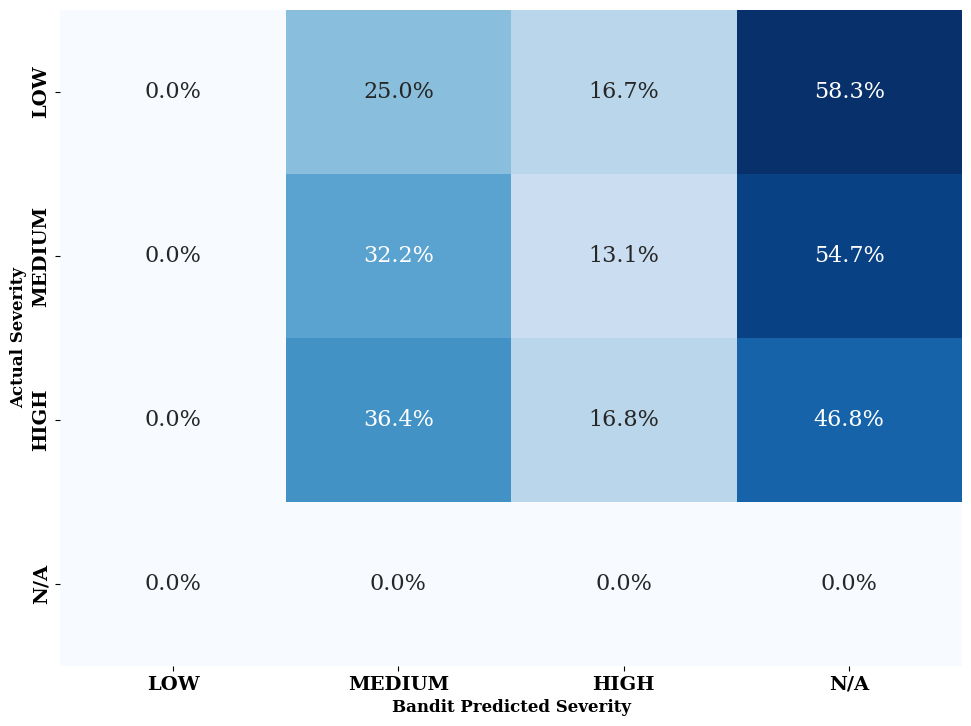

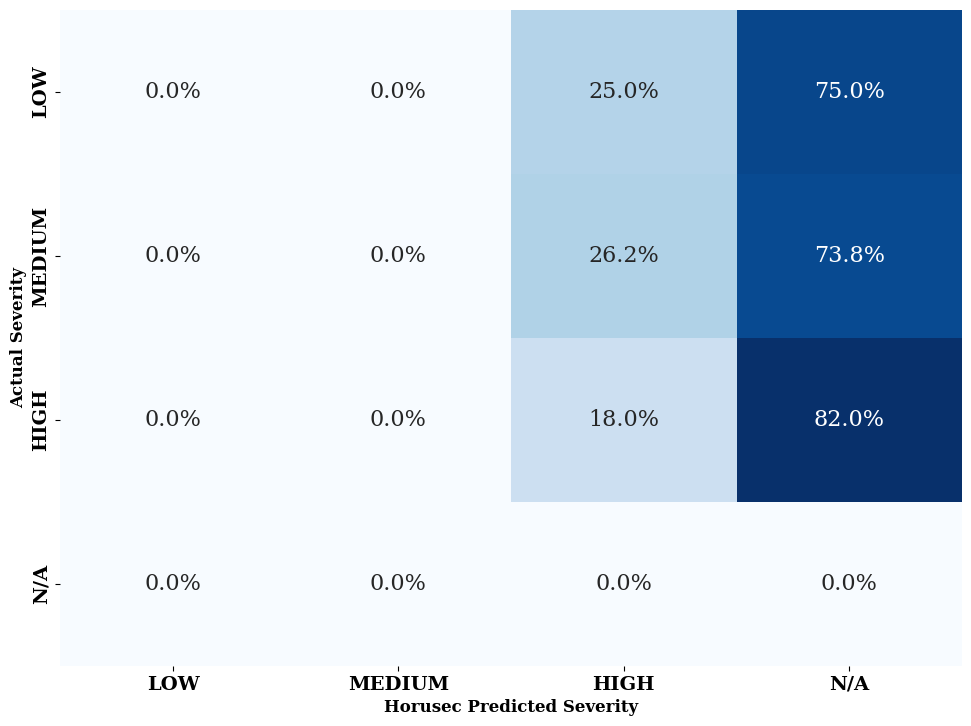

In [39]:
for tool in df['tool']:
  classes = ['LOW', 'MEDIUM', 'HIGH', 'N/A']

  # Calculate confusion matrix
  y_pred = globals()[f'{tool}_pred']
  y_true = globals()[f'{tool}_true']
  cm = confusion_matrix(y_true, y_pred, labels=classes)

  # Normalize by row (actual classes)
  row_sums = cm.sum(axis=1)
  cmn = np.zeros_like(cm, dtype=float)

  for i in range(len(row_sums)):
      if row_sums[i] > 0:  # Only normalize if row sum is not zero
          cmn[i] = cm[i] / row_sums[i]

  # Create the plot
  fig, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(cmn,
              annot=True,           # Show values in cells
              fmt='.1%',            # Format as percentage with 1 decimal
              # cmap='Purples',       # Choose your preferred colormap
              xticklabels=classes,
              yticklabels=classes,
              cbar=False,
              cmap='Blues')           # Remove the color bar

  # Add labels and title
  plt.ylabel('Actual Severity', fontsize=12, fontweight='bold')
  plt.xlabel(f'{tool} Predicted Severity', fontsize=12, fontweight='bold')

  # Optional: rotate y-axis labels if needed
  plt.yticks(rotation=90)  # Set to other values like 45, 90 if needed

  # Make tick labels bold
  plt.setp(ax.get_xticklabels(), fontweight='bold')
  plt.setp(ax.get_yticklabels(), fontweight='bold')

  # Adjust layout
  plt.tight_layout()
  plt.subplots_adjust(bottom=0.15)  # Make space for the bottom title

  # Save the figure
  plt.savefig(f'PDF/{tool}_confusion.pdf', format='pdf', dpi=300, bbox_inches='tight')
  plt.savefig(f'PNG/{tool}_confusion.png', format='png', dpi=300, bbox_inches='tight')

  # Show the plot
  plt.show()

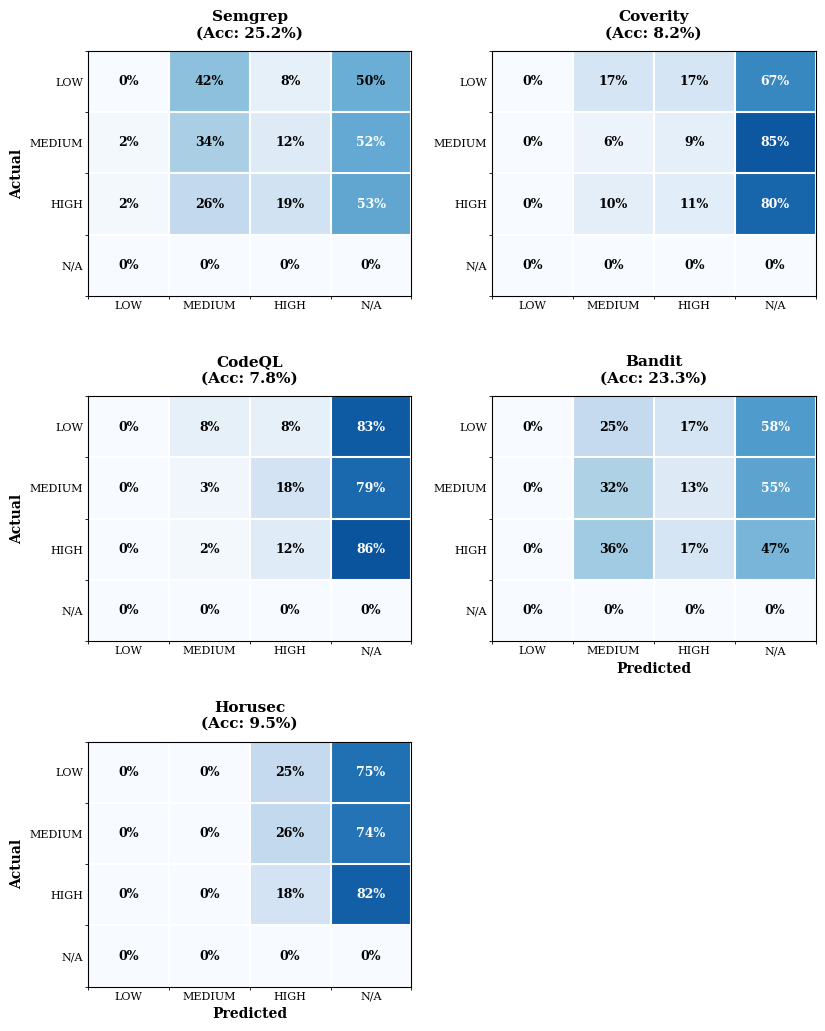

In [32]:
import math
tools = df['tool'].unique()
classes = ['LOW', 'MEDIUM', 'HIGH', 'N/A']

# Calculate layout for optimal fit with maximum 2 columns
n_tools = len(tools)
# Force maximum 2 columns for better readability
n_cols = min(2, n_tools)
n_rows = math.ceil(n_tools / n_cols)

# Figure size optimized for A4 two-column format with larger plots
# Increased width for better visibility
fig_width = 8.5  # For two-column format
fig_height = fig_width * (n_rows / n_cols) * 0.9  # Slightly taller aspect ratio

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))

# Handle different subplot configurations
if n_tools == 1:
    axes = np.array([axes])
elif n_rows == 1 and n_cols > 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

axes_flat = axes.flatten()

# Calculate all confusion matrices
matrices_data = []
for tool in tools:
    y_pred = globals()[f'{tool}_pred']
    y_true = globals()[f'{tool}_true']
    cm = confusion_matrix(y_true, y_pred, labels=classes)

    # Calculate metrics
    accuracy = np.trace(cm) / np.sum(cm) if np.sum(cm) > 0 else 0

    # Normalize by row (recall)
    row_sums = cm.sum(axis=1)
    cmn = np.zeros_like(cm, dtype=float)
    for i in range(len(row_sums)):
        if row_sums[i] > 0:
            cmn[i] = cm[i] / row_sums[i]

    matrices_data.append({
        'tool': tool,
        'cm_norm': cmn,
        'cm_raw': cm,
        'accuracy': accuracy
    })

# Create heatmaps
for idx, data in enumerate(matrices_data):
    ax = axes_flat[idx]

    # Create heatmap with academic styling
    im = ax.imshow(data['cm_norm'], cmap='Blues', aspect='auto', vmin=0, vmax=1)

    # Add text annotations with larger font
    for i in range(len(classes)):
        for j in range(len(classes)):
            count = data['cm_raw'][i, j]
            pct = data['cm_norm'][i, j]

            # Increased font size for better readability
            text_color = 'white' if pct > 0.5 else 'black'
            ax.text(j, i, f'{pct:.0%}', ha='center', va='center',
                   color=text_color, fontsize=9, fontweight='bold')

    # Customize axes with larger fonts
    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation=0, fontsize=8)
    ax.set_yticklabels(classes, rotation=0, fontsize=8)

    # Title with accuracy - larger font
    ax.set_title(f'{data["tool"]}\n(Acc: {data["accuracy"]:.1%})',
                fontsize=11, fontweight='bold', pad=10)

    # Labels only on appropriate edges
    if idx >= n_tools - n_cols or (n_rows > 1 and idx >= (n_rows-1) * n_cols):  # Bottom row
        ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')
    else:
        ax.set_xlabel('')

    if idx % n_cols == 0:  # Left column
        ax.set_ylabel('Actual', fontsize=10, fontweight='bold')
    else:
        ax.set_ylabel('')

    # Remove tick marks
    ax.tick_params(length=0)

    # Add subtle grid
    ax.set_xticks(np.arange(-0.5, len(classes), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(classes), 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=1.5)

# Hide unused subplots
for idx in range(n_tools, len(axes_flat)):
    axes_flat[idx].set_visible(False)

# Add colorbar (optional - uncomment if needed)
# if matrices_data:
#     # Position colorbar to the right
#     cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])
#     cbar = plt.colorbar(im, cax=cbar_ax)
#     cbar.set_label('Recall', rotation=270, labelpad=15, fontsize=10, fontweight='bold')
#     cbar.ax.tick_params(labelsize=8)

# Main title optimized for academic style
# fig.suptitle('Confusion Matrices: Severity Class Detection',
            #  fontsize=13, fontweight='bold', y=0.95)

# Tight layout with appropriate padding for 2-column layout
plt.tight_layout(rect=[0, 0, 1.0, 0.92], pad=1.0, h_pad=2.0, w_pad=1.0)

# Save as vector format for publications
plt.savefig('PDF/confusion_matrices_academic_2col.pdf',
            dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none',
            format='pdf')  # PDF is preferred for LaTeX
plt.savefig('PNG/confusion_matrices_academic_2col.png',
            dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none',
            format='png')  # PDF is preferred for LaTeX

# Also save as high-res PNG for presentations
plt.savefig('PNG/confusion_matrices_academic_2col.png',
            dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')

plt.show()

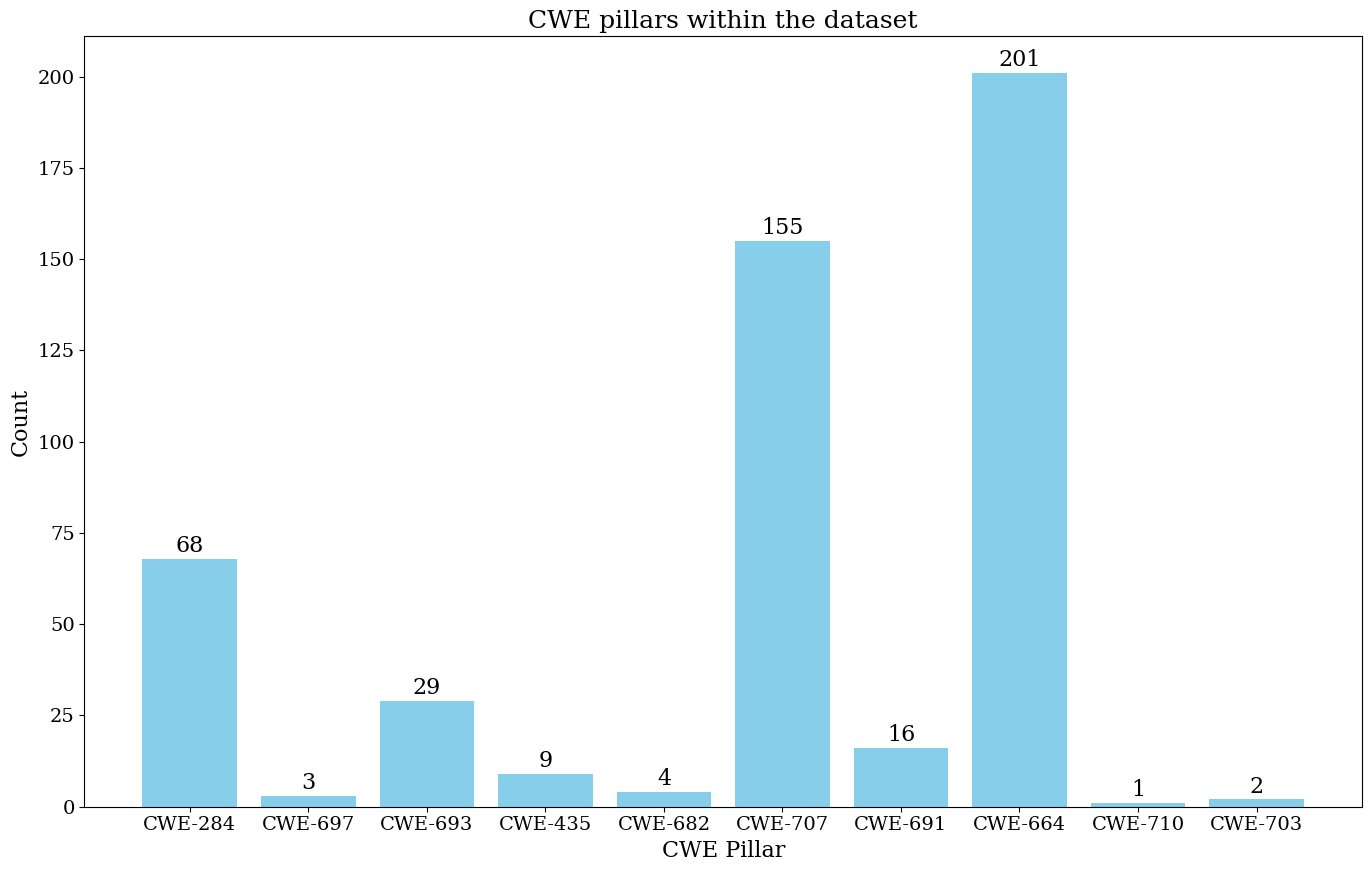

In [33]:
plt.figure(figsize=(14, 9))

# Create the bars
bars = plt.bar(
    ground_truth_per_pillar.keys(),
    ground_truth_per_pillar.values(),
    color='skyblue'
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}',
             ha='center', va='bottom')

# Add grid
# plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Alternative grid options:
# plt.grid(True, alpha=0.3, linestyle='--')  # Dashed grid
# plt.grid(axis='y', alpha=0.3)             # Only horizontal lines

plt.xlabel('CWE Pillar')
plt.ylabel('Count')
plt.title("CWE pillars within the dataset")
plt.tight_layout()
plt.savefig("PDF/cwe_pillars_dataset.pdf", format='pdf', bbox_inches='tight')
plt.savefig("PNG/cwe_pillars_dataset.png", format='png', bbox_inches='tight')
plt.show()

In [40]:
!zip -r /content/PDF.zip /content/PDF
!zip -r /content/PNG.zip /content/PNG

updating: content/PDF/ (stored 0%)
updating: content/PDF/cwe_pillars_dataset.pdf (deflated 30%)
updating: content/PDF/detection_rate_by_tool.pdf (deflated 29%)
updating: content/PDF/peformance_by_tool.pdf (deflated 29%)
updating: content/PDF/tool_performance_severity_radar.pdf (deflated 24%)
updating: content/PDF/performance_plot.pdf (deflated 28%)
updating: content/PDF/confusion_matrices_academic_2col.pdf (deflated 46%)
updating: content/PDF/tp_fp_stacked_percent_bar.pdf (deflated 29%)
updating: content/PDF/performance_severity_plot.pdf (deflated 29%)
updating: content/PDF/detection_rate_heatmap.pdf (deflated 31%)
updating: content/PDF/recall_by_pillar.pdf (deflated 28%)
updating: content/PDF/tool_performance_radar.pdf (deflated 25%)
updating: content/PDF/Bandit_confusion.pdf (deflated 34%)
updating: content/PDF/Semgrep_confusion.pdf (deflated 33%)
updating: content/PDF/CodeQL_confusion.pdf (deflated 34%)
updating: content/PDF/Coverity_confusion.pdf (deflated 34%)
updating: content/PD